In [1]:
from elastic_def import *
from pathlib import Path
import PIL.Image as Image

%load_ext autoreload
%autoreload 2
%matplotlib inline

Let's check the images.

In [2]:
img_path = Path.home() / 'data/isbi2012/pngs/train/images/0.png'
mask_path = Path.home() / 'data/isbi2012/pngs/train/masks/0.png'
img = Image.open(img_path)
mask = Image.open(mask_path)

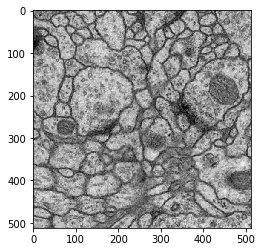

In [3]:
plt.imshow(img, cmap='gray');

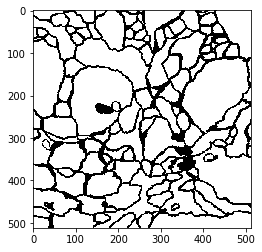

In [4]:
plt.imshow(mask, cmap='gray');

Now let's try to reproduce elastic deformation.

In [5]:
# Load images
im = cv2.imread(str(img_path), -1)
im_mask = cv2.imread(str(mask_path), -1)

In [6]:
im.shape, im_mask.shape

((512, 512), (512, 512))

In [7]:
im[...,None].shape

(512, 512, 1)

In [8]:
# Draw grid lines
draw_grid(im, 50)
draw_grid(im_mask, 50)

In [9]:
# Merge images into separete channels (shape will be (cols, rols, 2))
im_merge = np.concatenate((im[...,None], im_mask[...,None]), axis=2)

In [10]:
im_merge.shape

(512, 512, 2)

In [11]:
# Apply transformation on image
im_merge_t = elastic_transform(im_merge, im_merge.shape[1] * 2, im_merge.shape[1] * 0.08, im_merge.shape[1] * 0.08)

In [14]:
im_merge_t.shape

(512, 512, 2)

In [15]:
im_merge_t[..., 0].shape

(512, 512)

In [16]:
im_merge_t[:, :, 0].shape

(512, 512)

In [18]:
x, y = np.array_split(im_merge_t, 2, axis=2)

In [19]:
x.shape, y.shape

((512, 512, 1), (512, 512, 1))

In [12]:
# Split image and mask
im_t = im_merge_t[..., 0]
im_mask_t = im_merge_t[..., 1]

In [13]:
im_t.shape, im_mask_t.shape

((512, 512), (512, 512))

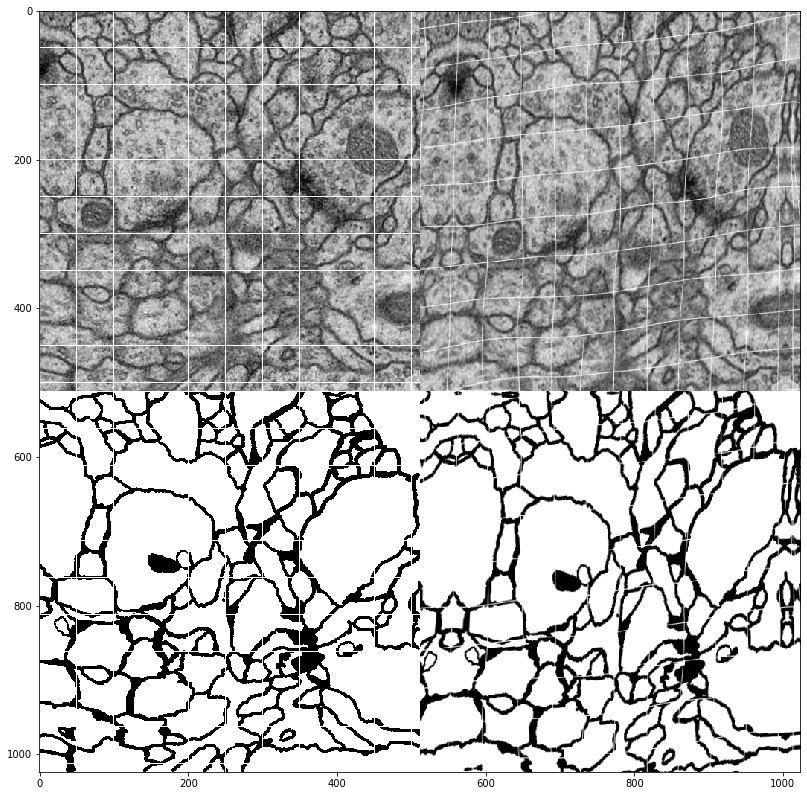

In [22]:



# Display result
plt.figure(figsize=(16, 14))
plt.imshow(np.c_[np.r_[im, im_mask], np.r_[im_t, im_mask_t]], cmap='gray')

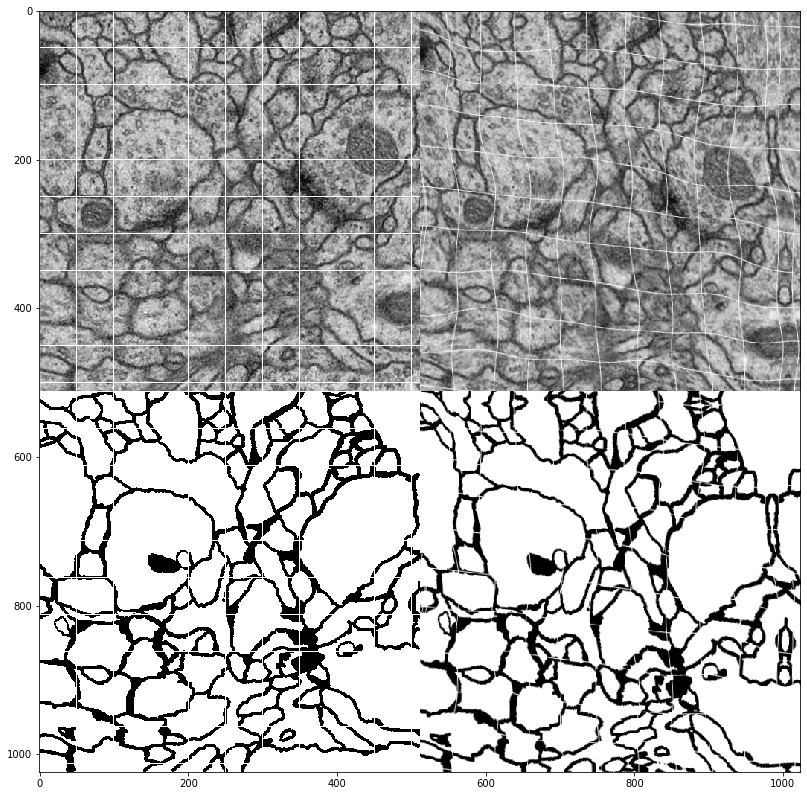

In [15]:
# Apply transformation on image
im_merge_t = elastic_transform(im_merge, im_merge.shape[1] * 3, im_merge.shape[1] * 0.07, im_merge.shape[1] * 0.09)

# Split image and mask
im_t = im_merge_t[...,0]
im_mask_t = im_merge_t[...,1]

# Display result
plt.figure(figsize = (16,14))
plt.imshow(np.c_[np.r_[im, im_mask], np.r_[im_t, im_mask_t]], cmap='gray')